In [17]:
#qda con medidas de desempeño

import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Montar Google Drive si es necesario
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo de datos
file_path = '/content/drive/MyDrive/modelosEntregable/diabetesMultivariable.csv'

# Lectura de datos en Python
data = pd.read_csv(file_path, header=0, sep=';', engine='python')

# Variables de interés
X = data[['EDAD', 'IMC', 'ARTRITIS', 'DESNUTRICION']]
y = data['DIABETES']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación de una instancia del modelo QDA
qda = QuadraticDiscriminantAnalysis()

# Entrenamiento del modelo
qda.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = qda.predict(X_test)

# Cálculo de la precisión
accuracy = accuracy_score(y_test, y_pred)

# Cálculo de la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Cálculo de la exhaustividad (recall)
recall = recall_score(y_test, y_pred)

# Cálculo de la puntuación F1
f1 = f1_score(y_test, y_pred)

# Cálculo de la precisión
precision = precision_score(y_test, y_pred)

# Imprimir los resultados
print("Exactitud del modelo QDA:", accuracy)
print("Matriz de confusión del modelo QDA:")
print(confusion)
print("Exhaustividad (Recall) del modelo QDA:", recall)
print("Puntuación F1 del modelo QDA:", f1)
print("Precisión del modelo QDA:", precision)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Exactitud del modelo QDA: 0.86
Matriz de confusión del modelo QDA:
[[3404   79]
 [ 481   36]]
Exhaustividad (Recall) del modelo QDA: 0.06963249516441006
Puntuación F1 del modelo QDA: 0.11392405063291139
Precisión del modelo QDA: 0.3130434782608696


Medidas de desempeño:
----------------------------
Precisión: 0.9150
Exactitud: 0.9150
Exhaustividad (Recall): 0.9150
Puntuación F1: 0.8991

Matriz de confusión:
------------------------
[[3465   18]
 [ 322  195]]


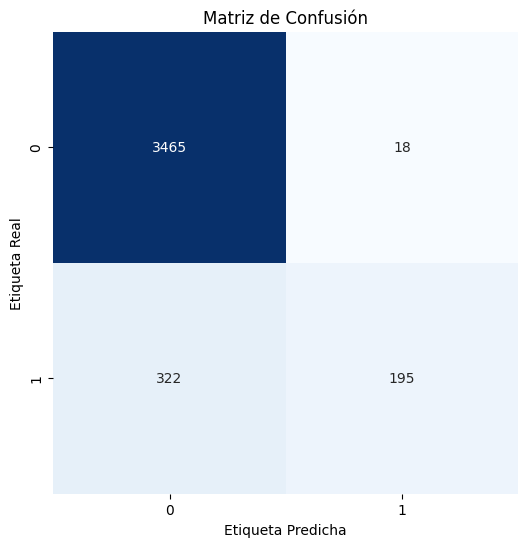

In [18]:
#ventanas de parzen con medidas de desempeño
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KernelDensity

# Definir la función de kernel (en este caso, utilizaremos el kernel Gaussiano)
def gaussian_kernel(x, sigma):
    return np.exp(-0.5 * (x / sigma)**2) / (np.sqrt(2 * np.pi) * sigma)

# Definir la función de Ventana de Parzen
def parzen_window(X_train, y_train, X_test, h, kernel):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    n_classes = len(np.unique(y_train))
    y_pred = np.zeros(n_test)

    for i in range(n_test):
        class_probs = np.zeros(n_classes)
        for j in range(n_train):
            dist = np.linalg.norm(X_test[i] - X_train[j]) / h
            weight = kernel(dist)
            class_probs[int(y_train[j])] += weight

        y_pred[i] = np.argmax(class_probs)

    return y_pred

# Lectura de datos en Python
data = pd.read_csv('/content/drive/MyDrive/modelosEntregable/diabetesMultivariable.csv', header=0, sep=';', engine='python')

# Variables de interés
X = data[['EDAD', 'IMC', 'ARTRITIS','DESNUTRICION']]
y = data['DIABETES']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el ancho de banda (ventana) y la función de kernel (por ejemplo, kernel Gaussiano)
h = 0.5
kernel = lambda x: gaussian_kernel(x, sigma=1.0)

# Aplicar Ventana de Parzen en los datos de prueba
y_pred = parzen_window(X_train.values, y_train.values, X_test.values, h, kernel)

# Evaluar las medidas de desempeño
accuracy = accuracy_score(y_test.values, y_pred)
precision = precision_score(y_test.values, y_pred, average='weighted')
recall = recall_score(y_test.values, y_pred, average='weighted')
f1 = f1_score(y_test.values, y_pred, average='weighted')

# Obtener la matriz de confusión
confusion = confusion_matrix(y_test.values, y_pred)

# Impresión de las medidas de desempeño
print("Medidas de desempeño:")
print("----------------------------")
print(f"Precisión: {precision:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuación F1: {f1:.4f}")

# Impresión de la matriz de confusión
print("\nMatriz de confusión:")
print("------------------------")
print(confusion)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()



In [ ]:
#correlaccion

import pandas as pd

from google.colab import drive

# lectura de datos en Python
data = pd.read_csv(file_path, header=0, sep=';', engine='python')

# Lectura de datos en Python
data = pd.read_csv('/content/drive/MyDrive/modelosEntregable/diabetesMultivariable.csv', header=0, sep=';', engine='python')

# Convertir valores 1 y 0 a booleanos
target = data['DIABETES'].astype(bool)

# Calcular la matriz de correlación con la variable objetivo convertida
correlation_matrix = data[['EDAD', 'IMC', 'ARTRITIS', 'DESNUTRICION']].corrwith(target)

# Obtener los valores absolutos de la correlación
correlation_with_target = correlation_matrix.abs()

# Obtener el índice de Fisher
fisher_index = (correlation_with_target**2) / (1 - correlation_with_target**2)

# Imprimir los resultados
print("Correlación con la variable objetivo:")
print(correlation_with_target)
print("\nÍndice de Fisher:")
print(fisher_index)



Correlación con la variable objetivo:
EDAD            0.240311
IMC             0.136171
ARTRITIS        0.016012
DESNUTRICION    0.051815
dtype: float64

Índice de Fisher:
EDAD            0.061289
IMC             0.018893
ARTRITIS        0.000256
DESNUTRICION    0.002692
dtype: float64


In [ ]:
#busqueda secuencia ascendente
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Lectura de datos en Python
data = pd.read_csv('/content/drive/MyDrive/modelosEntregable/diabetesMultivariable.csv', header=0, sep=';', engine='python')

# Variables de interés
X = data[['EDAD', 'IMC', 'ARTRITIS', 'DESNUTRICION']]
y = data['DIABETES']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una lista con todas las características disponibles
all_features = X.columns.tolist()

# Crear una lista para almacenar las características seleccionadas
selected_features = []

# Crear una lista para almacenar los resultados de cada iteración
results = []

# Crear una instancia del modelo de Gradient Boosting Tree
model = GradientBoostingClassifier()

# Iterar sobre las características disponibles
for i in range(len(all_features)):
    best_accuracy = 0.0
    best_feature = None
    
    # Iterar sobre las características restantes que aún no han sido seleccionadas
    for feature in all_features:
        # Agregar la característica al conjunto de características seleccionadas
        current_features = selected_features + [feature]
        
        # Entrenar el modelo con las características seleccionadas
        model.fit(X_train[current_features], y_train)
        
        # Realizar predicciones en los datos de prueba
        y_pred = model.predict(X_test[current_features])
        
        # Calcular la precisión del modelo
        accuracy = accuracy_score(y_test, y_pred)
        
        # Verificar si se ha encontrado una característica que mejore la precisión del modelo
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature = feature
    
    # Agregar la mejor característica al conjunto de características seleccionadas
    selected_features.append(best_feature)
    
    # Almacenar los resultados de la iteración actual
    results.append({'Selected Features': selected_features.copy(), 'Accuracy': best_accuracy})

# Imprimir los resultados de la búsqueda secuencial ascendente
print("Resultados de la búsqueda secuencial ascendente:\n")
print("Características seleccionadas\tPrecisión del modelo")
for result in results:
    print(result['Selected Features'], "\t\t", result['Accuracy'])


Resultados de la búsqueda secuencial ascendente:

Características seleccionadas	Precisión del modelo
['IMC'] 		 0.87675
['IMC', 'EDAD'] 		 0.88275
['IMC', 'EDAD', 'DESNUTRICION'] 		 0.88525
['IMC', 'EDAD', 'DESNUTRICION', 'EDAD'] 		 0.88525


In [ ]:
#Extracción de características utilizando el método PCA (Análisis de Componentes Principales)
import pandas as pd
from sklearn.decomposition import PCA

# Lectura de datos en Python
data = pd.read_csv('/content/drive/MyDrive/modelosEntregable/diabetesMultivariable.csv', header=0, sep=';', engine='python')

# Variables de interés
X = data[['EDAD', 'IMC', 'ARTRITIS', 'DESNUTRICION']]

# Normalización de los datos
X_norm = (X - X.mean()) / X.std()

# Creación de una instancia del modelo PCA
pca = PCA()

# Ajuste del modelo PCA a los datos normalizados
pca.fit(X_norm)

# Obtención de los componentes principales
components = pca.components_

# Obtención de las varianzas explicadas por cada componente principal
explained_variances = pca.explained_variance_ratio_

# Imprimir los resultados
print("Componentes principales:")
print(components)
print("\nVarianzas explicadas:")
print(explained_variances)


Componentes principales:
[[ 0.37662816  0.68806809  0.11939949 -0.60865203]
 [ 0.53421457 -0.11772158  0.76183511  0.34693471]
 [-0.68996273 -0.0378481   0.63513924 -0.34513344]
 [-0.31099428  0.71503249  0.04414942  0.62454938]]

Varianzas explicadas:
[0.3554409  0.25987011 0.23254596 0.15214303]


Medidas de desempeño:
----------------------------
Precisión: 0.8897
Exactitud: 0.8825
Exhaustividad (Recall): 0.8825
Puntuación F1: 0.8383

Matriz de confusión:
------------------------
[[3480    3]
 [ 467   50]]


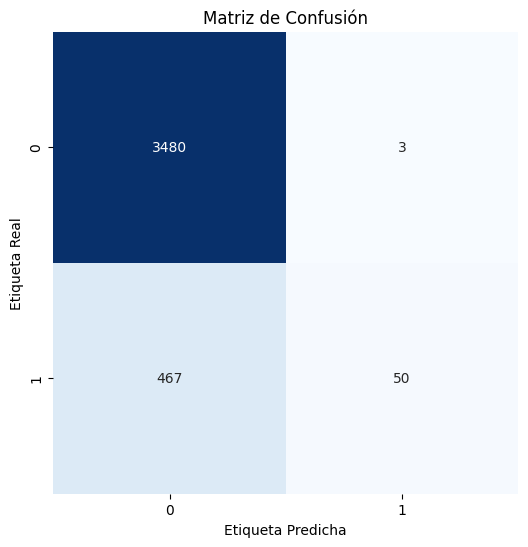

In [19]:
#GradientBoostingClassifier 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Lectura de datos en Python
data = pd.read_csv('/content/drive/MyDrive/modelosEntregable/diabetesMultivariable.csv', header=0, sep=';', engine='python')

# Variables de interés
X = data[['EDAD', 'IMC', 'ARTRITIS', 'DESNUTRICION']]
y = data['DIABETES']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación de una instancia del modelo de Gradiente Boosting Tree
gbt = GradientBoostingClassifier()

# Entrenamiento del modelo
gbt.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = gbt.predict(X_test)

# Evaluación de las medidas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Obtención de la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Impresión de las medidas de desempeño
print("Medidas de desempeño:")
print("----------------------------")
print(f"Precisión: {precision:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuación F1: {f1:.4f}")

# Impresión de la matriz de confusión
print("\nMatriz de confusión:")
print("------------------------")
print(confusion)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()



Medidas de desempeño:
----------------------------
Precisión: 0.8514
Exhaustividad (Recall): 0.8715
Puntuación F1: 0.8133
Exactitud (Accuracy): 0.8715

Matriz de confusión:
------------------------
[[3481    2]
 [ 512    5]]


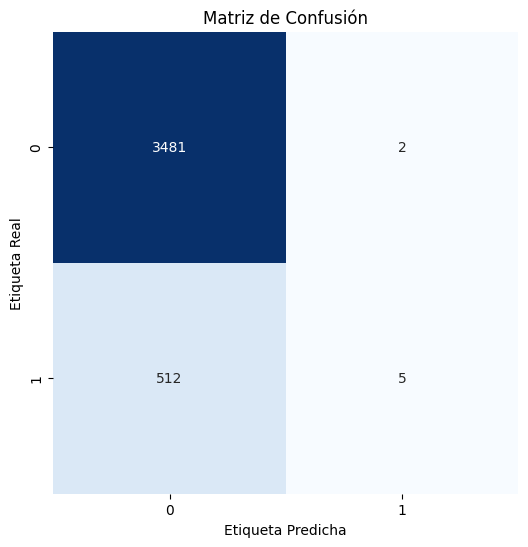

In [8]:
#redes neuronales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Lectura de datos en Python
data = pd.read_csv('/content/drive/MyDrive/modelosEntregable/diabetesMultivariable.csv', header=0, sep=';', engine='python')

# Variables de interés
X = data[['EDAD', 'IMC', 'ARTRITIS', 'DESNUTRICION']]
y = data['DIABETES']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación de una instancia del modelo de Red Neuronal Artificial
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Entrenamiento del modelo
mlp.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = mlp.predict(X_test)

# Evaluación de las medidas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Obtención de la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Impresión de las medidas de desempeño
print("Medidas de desempeño:")
print("----------------------------")
print(f"Precisión: {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuación F1: {f1:.4f}")
print(f"Exactitud (Accuracy): {accuracy:.4f}")

# Impresión de la matriz de confusión
print("\nMatriz de confusión:")
print("------------------------")
print(confusion)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()



Medidas de desempeño:
----------------------------
Precisión: 0.7582
Exhaustividad (Recall): 0.8708
Puntuación F1: 0.8106
Exactitud (Accuracy): 0.8708

Matriz de confusión:
------------------------
[[3483    0]
 [ 517    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


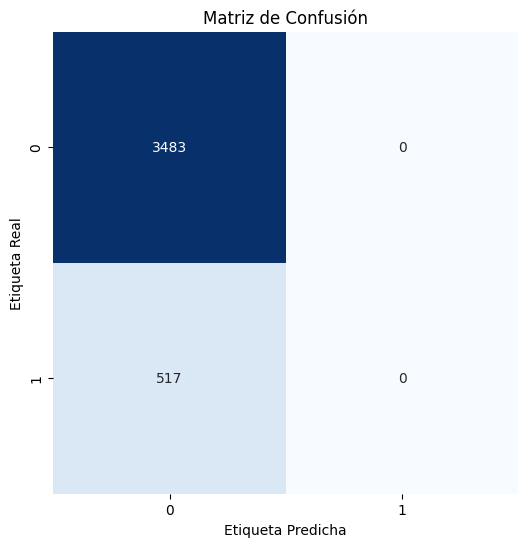

In [10]:
 #modelo de Máquinas de Soporte Vectorial con medidas de desempeño

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Lectura de datos en Python
data = pd.read_csv('/content/drive/MyDrive/modelosEntregable/diabetesMultivariable.csv', header=0, sep=';', engine='python')

# Variables de interés
X = data[['EDAD', 'IMC', 'ARTRITIS', 'DESNUTRICION']]
y = data['DIABETES']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación de una instancia del modelo de Máquinas de Soporte Vectorial
svm = SVC(kernel='rbf', random_state=42)

# Entrenamiento del modelo
svm.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = svm.predict(X_test)

# Evaluación de las medidas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Obtención de la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Impresión de las medidas de desempeño
print("Medidas de desempeño:")
print("----------------------------")
print(f"Precisión: {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuación F1: {f1:.4f}")
print(f"Exactitud (Accuracy): {accuracy:.4f}")

# Impresión de la matriz de confusión
print("\nMatriz de confusión:")
print("------------------------")
print(confusion)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()
